In [ ]:
'''
CONTEXT

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, 
taking an estimated 17.9 million lives each year, which accounts for 31% of 
all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and 
strokes, and one-third of these deaths occur prematurely in people under 70
years of age. Heart failure is a common event caused by CVDs and this dataset
contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk 
(due to the presence of one or more risk factors such as hypertension, diabetes,
hyperlipidaemia or already established disease) need early detection and management
wherein a machine learning model can be of great help.

'''


'''
ATTRIBUTE INFORMATION
The dataset contains 11 attributes including the target variable. The attributes are:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

'''

"\nATTRIBUTE INFORMATION\nThe dataset contains 11 attributes including the target variable. The attributes are:\n1. Age: age of the patient [years]\n2. Sex: sex of the patient [M: Male, F: Female]\n3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]\n4. RestingBP: resting blood pressure [mm Hg]\n5. Cholesterol: serum cholesterol [mm/dl]\n6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]\n7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]\n8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]\n9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]\n10. Oldpeak: oldpeak = ST [Numeric value measured in depression]\n11. ST_Slope: the slope of the peak exercise ST segment [Up: up

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/DELL/Desktop/python/Classification/Heart_failure_project/Data/heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [69]:
df.shape
df.isnull().sum()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


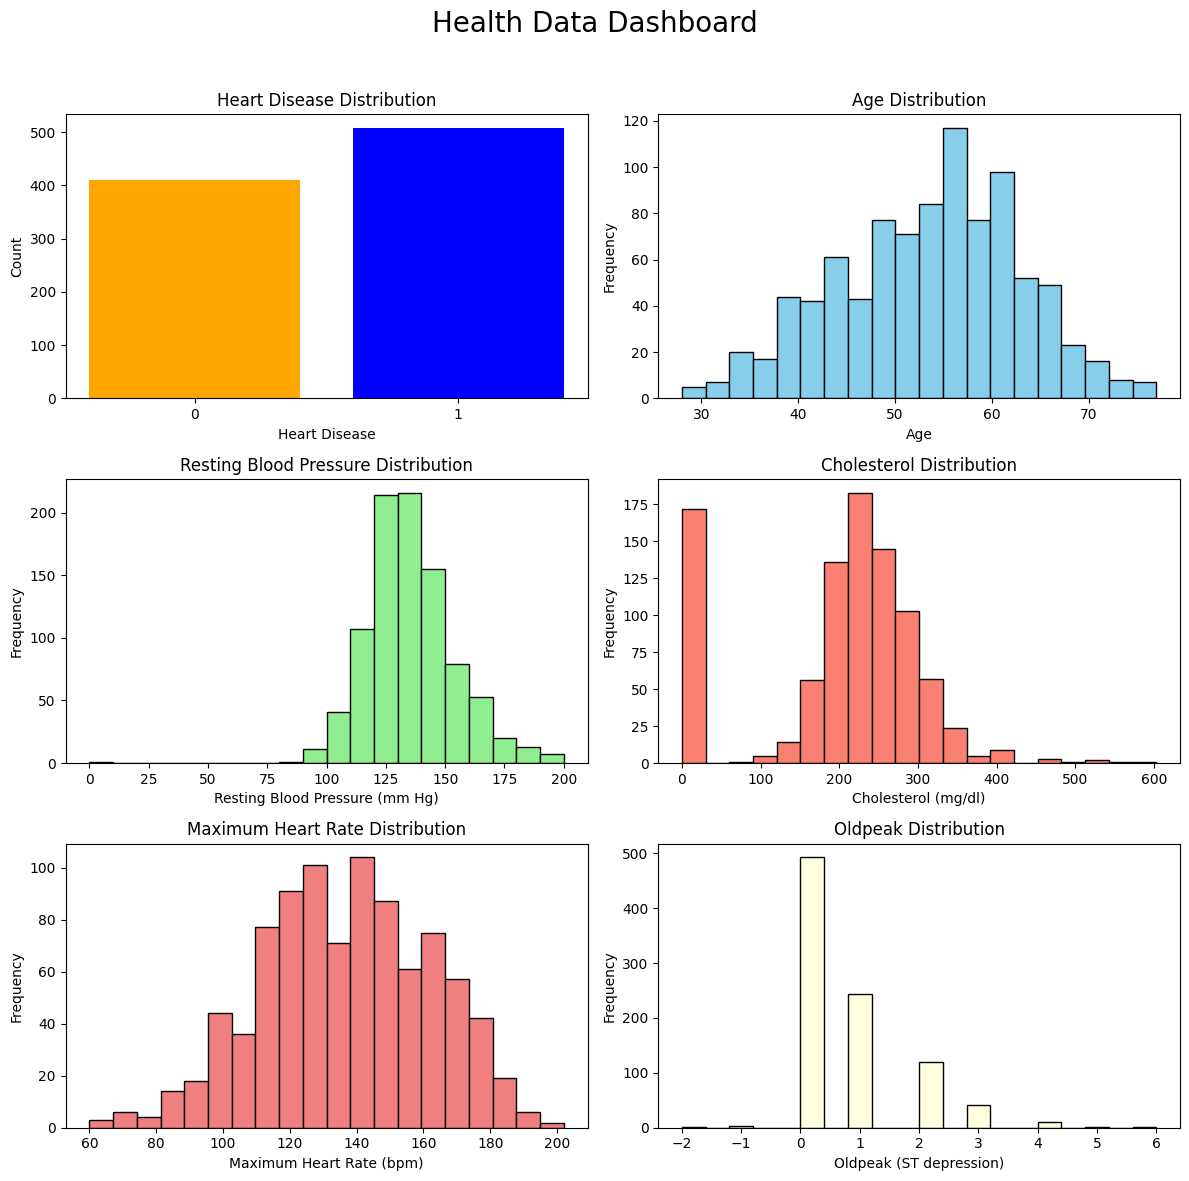

In [82]:
# Data Visualization for Heart Disease Dataset
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Health Data Dashboard', fontsize=20)

# Plot 1: Heart Disease Distribution
axs[0, 0].bar(df['HeartDisease'].value_counts().index, df['HeartDisease'].value_counts(), color=['blue', 'orange'])
axs[0, 0].set_title('Heart Disease Distribution')
axs[0, 0].set_xlabel('Heart Disease')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_xticks([0, 1])

# Plot 2: Age Distribution
axs[0, 1].hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
axs[0, 1].set_title('Age Distribution')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Resting Blood Pressure Distribution
axs[1, 0].hist(df['RestingBP'], bins=20, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Resting Blood Pressure Distribution')
axs[1, 0].set_xlabel('Resting Blood Pressure (mm Hg)')
axs[1, 0].set_ylabel('Frequency')

# Plot 4: Cholesterol Distribution
axs[1, 1].hist(df['Cholesterol'], bins=20, color='salmon', edgecolor='black')
axs[1, 1].set_title('Cholesterol Distribution')
axs[1, 1].set_xlabel('Cholesterol (mg/dl)')
axs[1, 1].set_ylabel('Frequency')

# Plot 5: Maximum Heart Rate Distribution
axs[2, 0].hist(df['MaxHR'], bins=20, color='lightcoral', edgecolor='black')
axs[2, 0].set_title('Maximum Heart Rate Distribution')
axs[2, 0].set_xlabel('Maximum Heart Rate (bpm)')
axs[2, 0].set_ylabel('Frequency')

# Plot 6: Oldpeak Distribution
axs[2, 1].hist(df['Oldpeak'], bins=20, color='lightyellow', edgecolor='black')
axs[2, 1].set_title('Oldpeak Distribution')
axs[2, 1].set_xlabel('Oldpeak (ST depression)')
axs[2, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [71]:
df = pd.get_dummies(df,drop_first=True ).astype(int)

In [72]:
df.loc[:10]

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1
5,39,120,339,0,170,0,0,1,0,1,0,1,0,0,0,1
6,45,130,237,0,170,0,0,0,1,0,0,1,0,0,0,1
7,54,110,208,0,142,0,0,1,1,0,0,1,0,0,0,1
8,37,140,207,0,130,1,1,1,0,0,0,1,0,1,1,0
9,48,120,284,0,120,0,0,0,1,0,0,1,0,0,0,1


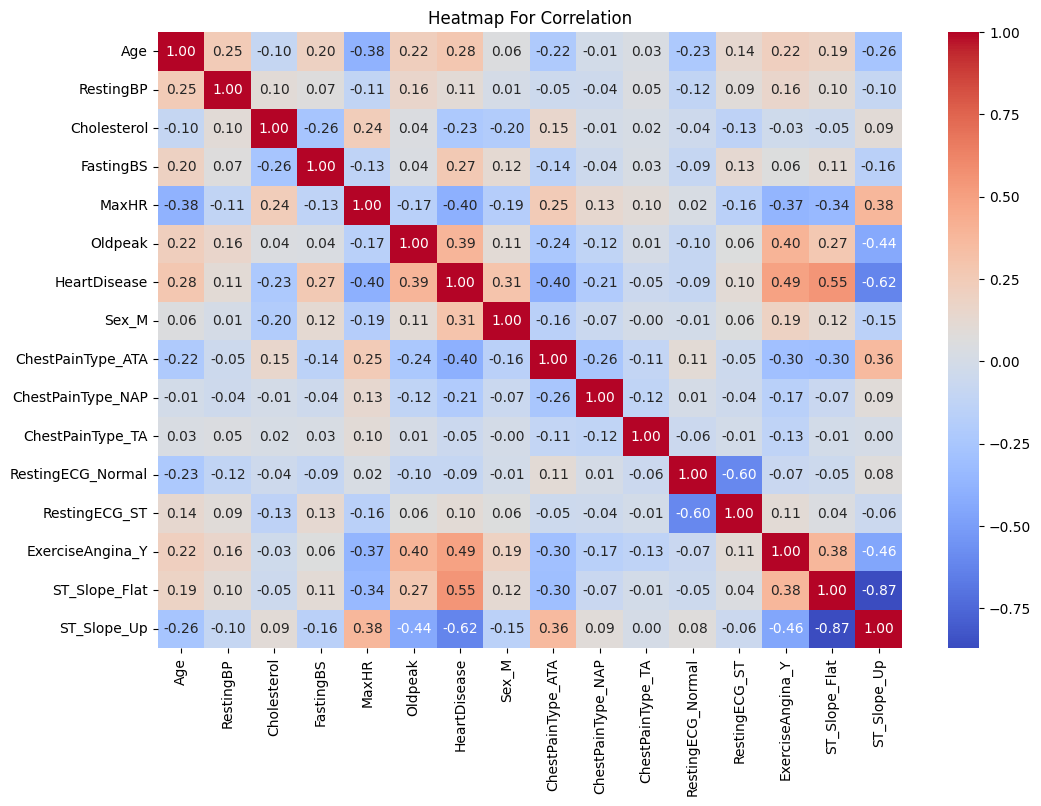

In [80]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Heatmap For Correlation')
plt.show()

In [73]:
## SCALING THE FEATURES(NORMALIZING)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = df.drop('HeartDisease', axis=1)
features_scaled = scaler.fit_transform(features)


In [74]:
from sklearn.model_selection import train_test_split

x = features_scaled
y = df['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state=42)


In [75]:
#MODEL SELECTION 

Accuracy: 0.8532608695652174
Classification Report:                precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



<Axes: >

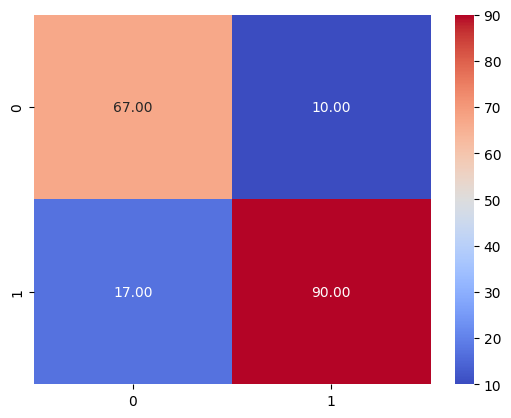

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


model= LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = '.2f', cmap = 'coolwarm')



Random Forest Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.89      0.90      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



<Axes: >

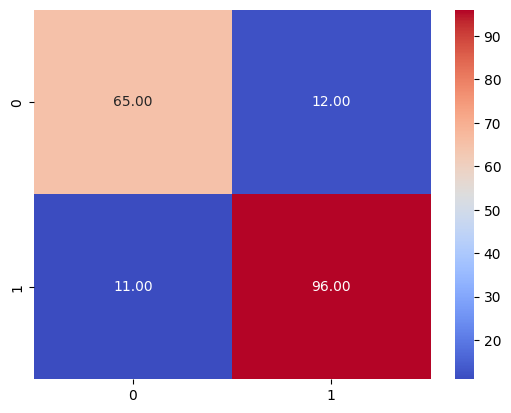

In [77]:
# RAIN FOREST APPROACH

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
rf_preds = rf_model.predict(x_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt = '.2f', cmap = 'coolwarm')


C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [02:07:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



<Axes: >

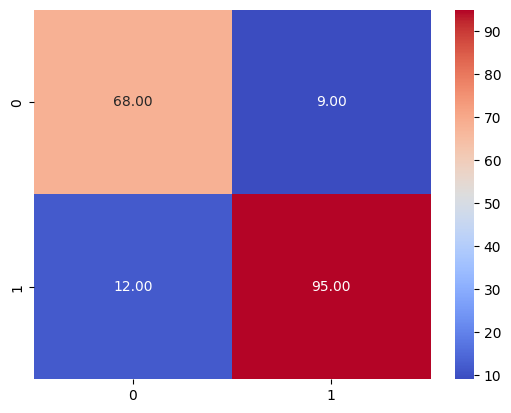

In [78]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)
xgb_preds = xgb_model.predict(x_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt = '.2f', cmap = 'coolwarm')






# THIS IS OUR BEST PERFORMING MODEL

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [02:07:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [02:07:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [02:07:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [02:07:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:7

Cross-Validation Accuracy Scores: [0.85869565 0.83152174 0.80434783 0.77595628 0.74863388]
Mean CV Accuracy: 0.8038310762651462


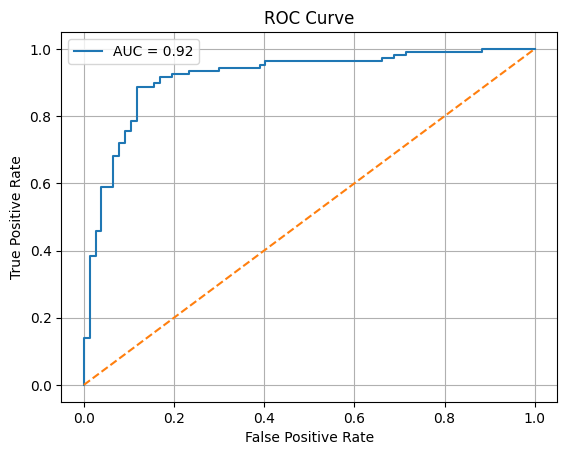

In [79]:
#Validating Our Model 
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(xgb_model, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

from sklearn.metrics import roc_auc_score, roc_curve

probs = xgb_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc_score = roc_auc_score(y_test, probs)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


